# Data loading & visualization

## Roadmap

- Load the model
- Iterate through dataloader
- Visualize some events

In [66]:
# use autoreload
%load_ext autoreload
%autoreload 2

import yaml
import numpy as np
from tqdm import tqdm
import seaborn as sns

# imports
from jepa.utils.dataset import TracksDatasetFixed

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Explore dataloader

In [31]:
with open("configs/0_testing.yaml", "r") as f:
    config = yaml.load(f, Loader=yaml.FullLoader)

In [32]:
loader = TracksDatasetFixed(
    **config["dataset_args"]
)

In [54]:
event_list = []
for i, event in enumerate(loader):
    event_list.append(event)
    
    if i >= 99:
        break

In [44]:
np.mean([x.shape[0] for x in x_list])

8.0

In [45]:
mask


tensor([True, True, True, True, True, True, True, True])

In [46]:
event_df.particles

,vx,vy,vz,pt,pphi,dimension,charge,particle_id,d0,phi
0,0.091989,-0.109776,0.0,2.556555,-3.010782,2,-1,0,0.054453,0.497887


In [47]:
event_df.tracks

array([[2, 0, 4, 6, 5, 1, 7],
       [0, 4, 6, 5, 1, 7, 3]])

In [48]:
event_df.hits

,x,y,particle_id
0,0.080726,-0.853333,0
1,-0.592553,-2.207571,0
2,0.113457,-0.486957,0
3,-1.273010,-2.716514,0
4,-0.005207,-1.214275,0
5,-0.340602,-1.898257,0
6,-0.145266,-1.564700,0
7,-0.902705,-2.483912,0


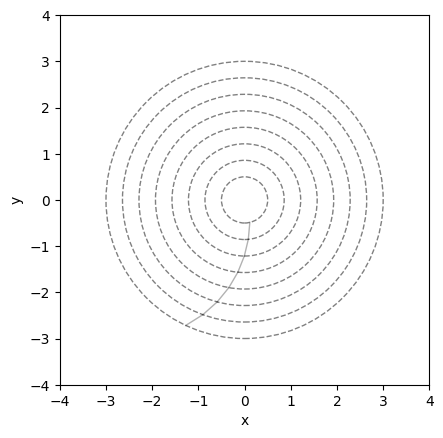

In [49]:
event_df.display()

## Circle Fit

In [81]:
from jepa.utils import fit_circle

In [51]:
(cx, cy), r = fit_circle(event_df.hits.x, event_df.hits.y)

In [52]:
print(f"Center: {(cx, cy)}, Radius: {r}")

Center: (-2.442724482208368, -0.4432470998937373), Radius: 2.5565550374846193


In [62]:
pred_pts = [fit_circle(event[2].hits.x, event[2].hits.y)[1] for event in tqdm(event_list)]
true_pts = [event[2].particles.pt.values for event in tqdm(event_list)]

100%|██████████| 100/100 [00:00<00:00, 117916.90it/s]


In [63]:
true_pts

[array([2.53930848]),
 array([2.585624]),
 array([2.57580482]),
 array([2.59581717]),
 array([2.5731405]),
 array([2.50454912]),
 array([2.58235945]),
 array([2.5118899]),
 array([2.54700225]),
 array([2.55363245]),
 array([2.50588839]),
 array([2.57391009]),
 array([2.54119825]),
 array([2.51200096]),
 array([2.53700414]),
 array([2.5929095]),
 array([2.5470917]),
 array([2.55485223]),
 array([2.55124018]),
 array([2.58736983]),
 array([2.52692361]),
 array([2.53769196]),
 array([2.56313986]),
 array([2.59285644]),
 array([2.50542564]),
 array([2.51138969]),
 array([2.56469827]),
 array([2.54003808]),
 array([2.51373058]),
 array([2.50614599]),
 array([2.54896007]),
 array([2.58546841]),
 array([2.55564811]),
 array([2.51507722]),
 array([2.56431617]),
 array([2.53010154]),
 array([2.5056971]),
 array([2.59632414]),
 array([2.5320487]),
 array([2.55312234]),
 array([2.51507988]),
 array([2.53266654]),
 array([2.5754509]),
 array([2.52109326]),
 array([2.59862233]),
 array([2.55468166]

In [72]:
errors = np.concatenate([np.abs(true_pt - pred_pt) for true_pt, pred_pt in zip(true_pts, pred_pts)])

<Axes: ylabel='Count'>

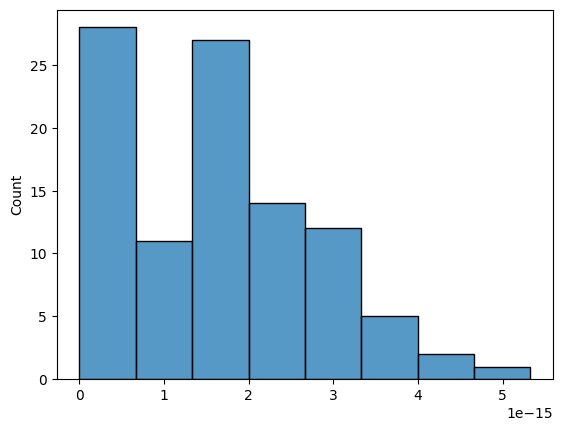

In [73]:
sns.histplot(errors)

## Nearest Neighbors

In [77]:
from torch_geometric.nn import radius_graph

In [80]:
radius_graph(x, r=1)

tensor([[2, 4, 6, 3, 5, 6, 7, 0, 4, 1, 7, 0, 2, 5, 6, 1, 4, 6, 7, 0, 1, 4, 5, 1,
         3, 5],
        [0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 6, 6, 6, 6, 7,
         7, 7]])

In [83]:
param_space = torch.stack([torch.tensor(fit_circle(event[2].hits.x, event[2].hits.y)) for event in tqdm(event_list)])
batch = torch.arange(param_space.shape[0])
param_space.shape

100%|██████████| 100/100 [00:00<00:00, 3218.81it/s]


torch.Size([100, 3])

In [85]:
radius_graph(param_space, 0.1, batch=batch)

tensor([], size=(2, 0), dtype=torch.int64)

In [86]:
param_space

tensor([[-1.6460, -1.9606,  2.5393],
        [ 2.3365,  0.9241,  2.5856],
        [ 2.0359, -1.6414,  2.5758],
        [ 0.4599,  2.4749,  2.5958],
        [ 1.0096,  2.3216,  2.5731],
        [ 2.0760,  1.1857,  2.5045],
        [ 2.0706, -1.6056,  2.5824],
        [ 0.3896,  2.5181,  2.5119],
        [-1.3692,  2.0884,  2.5470],
        [ 0.6784, -2.5248,  2.5536],
        [ 0.6575,  2.3875,  2.5059],
        [ 0.7471,  2.4874,  2.5739],
        [-0.1323, -2.6469,  2.5412],
        [ 2.3324, -0.8756,  2.5120],
        [ 1.8241, -1.5889,  2.5370],
        [ 0.1567, -2.5915,  2.5929],
        [-2.5065,  0.5706,  2.5471],
        [-1.9387,  1.5845,  2.5549],
        [-1.8405,  1.8416,  2.5512],
        [ 2.3502,  1.2262,  2.5874],
        [ 1.4639,  1.9034,  2.5269],
        [ 2.5622,  0.1519,  2.5377],
        [-2.5013, -0.3612,  2.5631],
        [-1.8165,  1.7679,  2.5929],
        [-0.7772, -2.3835,  2.5054],
        [-1.6186, -1.8720,  2.5114],
        [-1.2457,  2.2945,  2.5647],
 